In [2]:
# In what follows, we will be looking at the knn model for all the stores.

In [1]:
# Importing the basic packages

import pandas as pd
import seaborn as sns
import numpy as np

import math

import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv("sales.csv")

stores = pd.read_csv("stores.csv")

features = pd.read_csv("features.csv")

In [3]:
# Obtaining some quick look at the data

In [4]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
stores.shape

(45, 3)

In [8]:
sales.shape

(421570, 5)

In [9]:
features.shape

(8190, 12)

In [10]:
features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [11]:
# we will merge the given data sets

In [12]:
df_1 = pd.merge(features,sales, on = ["Date","Store","IsHoliday"], how="right")

In [13]:
df_1.shape


(421570, 14)

In [14]:
df = pd.merge(df_1, stores, on = "Store", how="left")

df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,1,46039.49,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,1,41595.55,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,1,19403.54,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,1,21827.90,A,151315


In [15]:
# Labeling 

from sklearn.preprocessing import LabelEncoder

df["IsHoliday"] = LabelEncoder().fit_transform(df["IsHoliday"])

df["Type"] = LabelEncoder().fit_transform(df["Type"])

In [16]:
# 1.Droping the NaN

df_drop = df.dropna()

In [17]:
X = df_drop.drop(columns=["Weekly_Sales","Date"])

y = df_drop["Weekly_Sales"]

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [19]:
X_train.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Type,Size
333291,35,37.24,3.695,20207.59,7982.96,2.64,9522.98,10733.96,141.214036,8.744,0,20,1,103681
18823,2,44.57,3.129,8321.44,92523.94,139.53,1515.40,3027.69,219.177306,7.441,1,83,0,202307
17446,2,84.79,3.571,4774.16,330.78,10.53,4253.28,4927.26,221.675146,6.565,0,59,0,202307
36256,4,35.92,3.103,2461.94,69.05,2938.24,52.00,4396.76,129.984548,5.143,0,55,0,205863
415866,45,47.65,3.530,23052.25,5449.62,189.24,3355.69,3864.60,188.063234,8.523,0,29,1,118221


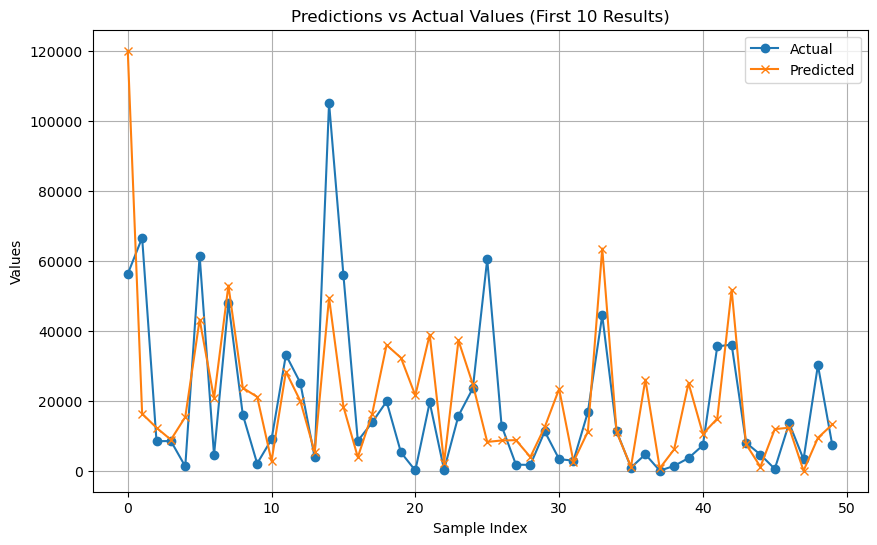

In [20]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)

neigh.fit(X_train,y_train)

y_pred = neigh.predict(X_test)


y_test_first_ten = y_test[0:50]
predictions_first_ten = y_pred[0:50]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(50), y_test_first_ten, marker='o', label='Actual')
plt.plot(range(50), predictions_first_ten, marker='x', label='Predicted')

# Adding titles and labels
plt.title('Predictions vs Actual Values (First 10 Results)')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

metrics = [mean_absolute_error, mean_absolute_error, r2_score]

for element in metrics:
    value = element(y_test, y_pred)
    print(f"The accuracy with respect to {element} is {value}.")

The accuracy with respect to <function mean_absolute_error at 0x000001821C9E5DA0> is 14371.554074252155.
The accuracy with respect to <function mean_absolute_error at 0x000001821C9E5DA0> is 14371.554074252155.
The accuracy with respect to <function r2_score at 0x000001821C9E62A0> is 0.14499727761283454.


In [22]:
# Median filling

In [23]:
df_Median = df.fillna(df.median())

C:\Users\GGPC\AppData\Local\Temp\ipykernel_22864\3495669198.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_Median = df.fillna(df.median())


In [40]:
Independents = []

for element in df_Median.columns:
    if element!= "Weekly_Sales" and element!= "IsHoliday" and element!= "Type":
        Independents.append(element)


In [ ]:
Independents_categorical = ["IsHoliday", "Type"]

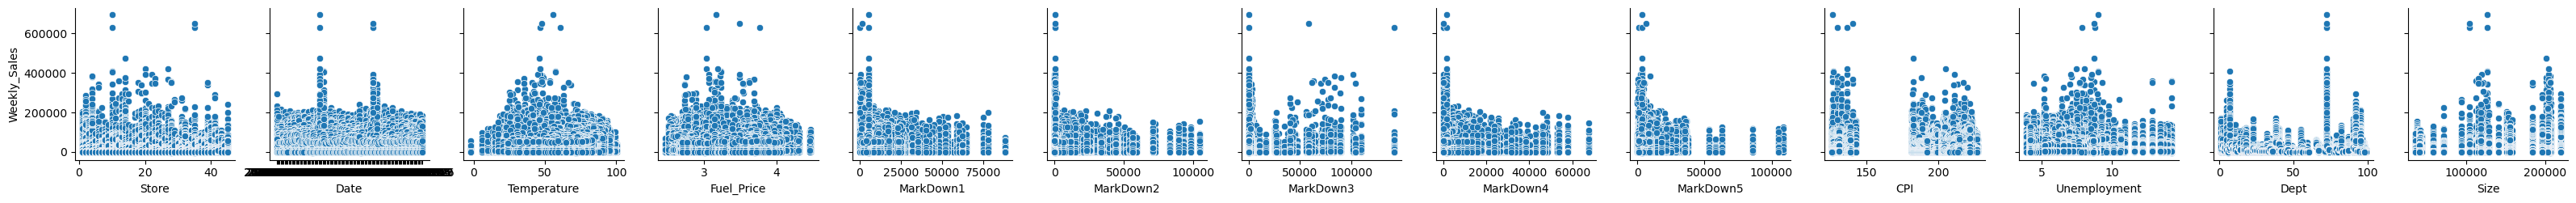

In [41]:
sns.pairplot(df_Median, y_vars=["Weekly_Sales"],
             x_vars=Independents)

In [51]:
corr_matrix = df_Median.corr()

# Display the correlation matrix
fig = plt.figure(figsize=(36,36), dpi = 480)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Correlation of each independent variable with the dependent variable
corr_matrix['Weekly_Sales'].sort_values(ascending=False)

C:\Users\GGPC\AppData\Local\Temp\ipykernel_22864\3812533949.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_Median.corr()


Weekly_Sales    1.000000
Size            0.243828
Dept            0.148032
MarkDown5       0.055702
MarkDown1       0.052739
MarkDown3       0.038524
MarkDown4       0.033820
MarkDown2       0.020342
IsHoliday       0.012774
Fuel_Price     -0.000120
Temperature    -0.002312
CPI            -0.020921
Unemployment   -0.025864
Store          -0.085195
Type           -0.182242
Name: Weekly_Sales, dtype: float64

In [53]:
import statsmodels.api as sm
import numpy as np

# Preparing the data
A = df_Median.drop(columns=["Weekly_Sales"])
B = df['Weekly_Sales']
A = sm.add_constant(A)  # Adds a constant term to the predictor

# Fit the model
model = sm.OLS(B, A).fit()

# Display the model summary
print(model.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Fit a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Display feature importances
features = X.columns
importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importances')
plt.show()


In [68]:
outliers_list = ["Temperature", "Fuel_Price", "Unemployment","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","Weekly_Sales"]

for element in outliers_list:
    q_low = df_Median[element].quantile(0.1)
    q_hi  = df_Median[element].quantile(0.9)
    features_filled_W_outlier = df_Median[(df_Median[element] >= q_low) & (df_Median[element] <= q_hi)]

In [69]:
X = df_Median.drop(columns=["Weekly_Sales","Date"])

y = df_Median["Weekly_Sales"]

In [84]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Fit a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Display feature importances
features = X
importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importances')
from sklearn.ensemble import RandomForestRegressor
import numpy as npplt.show()

KeyboardInterrupt: 

In [85]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

clf = RandomForestRegressor(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

feature_names = df_Median.drop(columns=["Weekly_Sales"])

# Built-in feature importance (Gini Importance)
importances = clf.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)


ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [88]:
X = df_Median.drop(columns=["Weekly_Sales","Date","Temperature", "Unemployment","CPI","Store","Type","Fuel_Price"])

y = df_Median["Weekly_Sales"]


from sklearn.preprocessing import normalize

X = normalize(X, norm="l1")

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, shuffle=True)

In [82]:
from sklearn.model_selection import cross_validate

neigh = KNeighborsRegressor(n_neighbors=4)

cv_results = cross_validate(neigh, X, y ,cv=3)

cv_results['test_score']

array([-0.28190714, -0.34965339, -0.34229957])

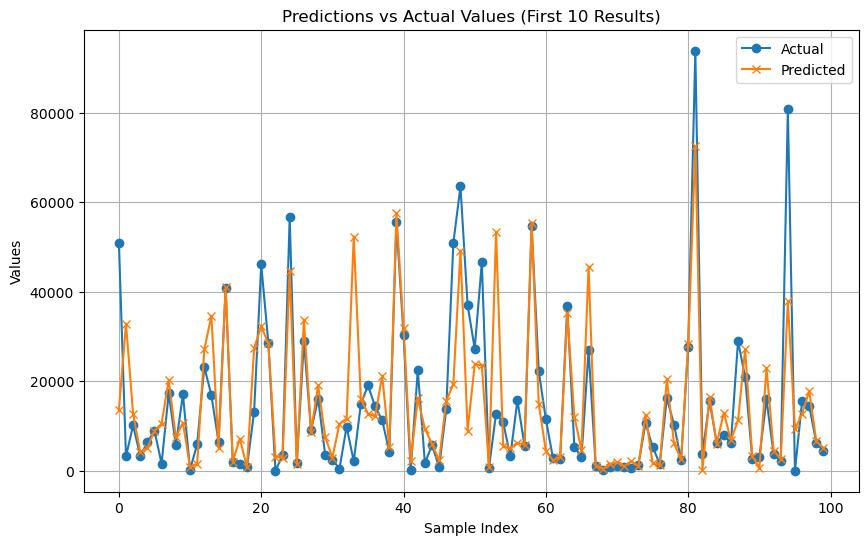

In [75]:
neigh = KNeighborsRegressor(n_neighbors=4)

neigh.fit(X_train,y_train)

y_pred = neigh.predict(X_test)


y_test_first_ten = y_test[0:100]
predictions_first_ten = y_pred[00:100]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(100), y_test_first_ten, marker='o', label='Actual')
plt.plot(range(100), predictions_first_ten, marker='x', label='Predicted')

# Adding titles and labels
plt.title('Predictions vs Actual Values (First 10 Results)')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [76]:
metrics = [mean_absolute_error, mean_absolute_error, r2_score]

for element in metrics:
    value = element(y_test, y_pred)
    print(f"The accuracy with respect to {element} is {value}.")

The accuracy with respect to <function mean_absolute_error at 0x000001821C9E5DA0> is 6805.393494400478.
The accuracy with respect to <function mean_absolute_error at 0x000001821C9E5DA0> is 6805.393494400478.
The accuracy with respect to <function r2_score at 0x000001821C9E62A0> is 0.6093229175888812.


In [ ]:
#Trying with poly

In [90]:
from sklearn.linear_model import LinearRegression




from sklearn.preprocessing import PolynomialFeatures

linear_model = LinearRegression()

polynomial_3 = PolynomialFeatures(degree=4)

X_poly = polynomial_3.fit_transform(X_train)

X_poly_test = polynomial_3.fit_transform(X_test)

linear_model.fit(X_poly,y_train)

y_pred = linear_model.predict(X_test)

y_test_first_ten = y_test[0:100]
predictions_first_ten = y_pred[00:100]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(100), y_test_first_ten, marker='o', label='Actual')
plt.plot(range(100), predictions_first_ten, marker='x', label='Predicted')

# Adding titles and labels
plt.title('Predictions vs Actual Values (First 10 Results)')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()



ValueError: X has 8 features, but LinearRegression is expecting 495 features as input.

In [ ]:
# mean filling 

In [ ]:
df_Mean = df.fillna(df.mean())

C:\Users\GGPC\AppData\Local\Temp\ipykernel_17144\1399523568.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_Mean = df.fillna(df.mean())


In [ ]:
X = df_Mean.drop(columns=["Weekly_Sales","Date"])

y = df_Mean["Weekly_Sales"]

In [ ]:
from sklearn.preprocessing import normalize

X = normalize(X, norm="l1")



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

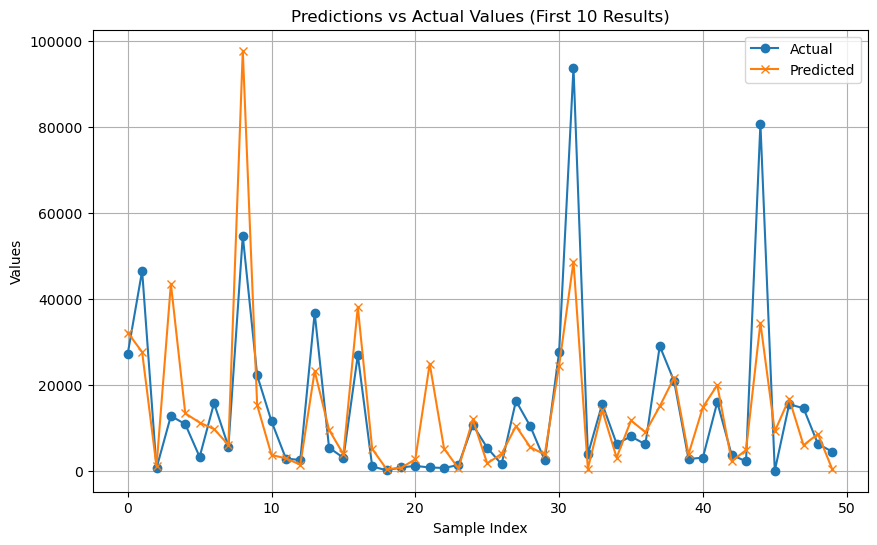

In [ ]:

#I increased the neighbourhood to 5

neigh = KNeighborsRegressor(n_neighbors=5)

neigh.fit(X_train,y_train)

y_pred = neigh.predict(X_test)


y_test_first_ten = y_test[50:100]
predictions_first_ten = y_pred[50:100]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(50), y_test_first_ten, marker='o', label='Actual')
plt.plot(range(50), predictions_first_ten, marker='x', label='Predicted')

# Adding titles and labels
plt.title('Predictions vs Actual Values (First 10 Results)')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
metrics = [mean_absolute_error, mean_absolute_error, r2_score]

for element in metrics:
    value = element(y_test, y_pred)
    print(f"The accuracy with respect to {element} is {value}.")

The accuracy with respect to <function mean_absolute_error at 0x0000023A02045DA0> is 10271.216744961297.
The accuracy with respect to <function mean_absolute_error at 0x0000023A02045DA0> is 10271.216744961297.
The accuracy with respect to <function r2_score at 0x0000023A020462A0> is 0.4129107730262954.


In [ ]:
# Filling with knn

In [ ]:
from sklearn.impute import KNNImputer

numerical_float_columns = ["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]

selected_data = df[numerical_float_columns]

In [ ]:
imputer = KNNImputer(n_neighbors=5)

imputed_data = imputer.fit_transform(selected_data)

df_knn = pd.DataFrame(imputed_data,columns=numerical_float_columns)

df_knn.head()

KeyboardInterrupt: 